In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')

In [12]:
matches=pd.read_csv('matches[1].csv')   
delivery=pd.read_csv('deliveries[1].csv')
matches.head()
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [5]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [6]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'Delhi Capitals']


In [7]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 32

Total umpires  61


In [8]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [13]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146


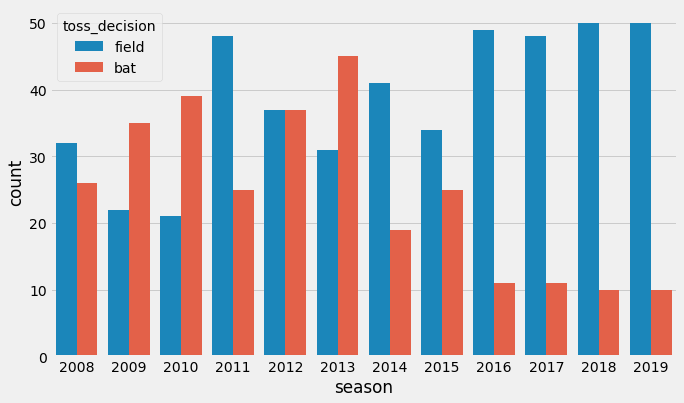

In [14]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

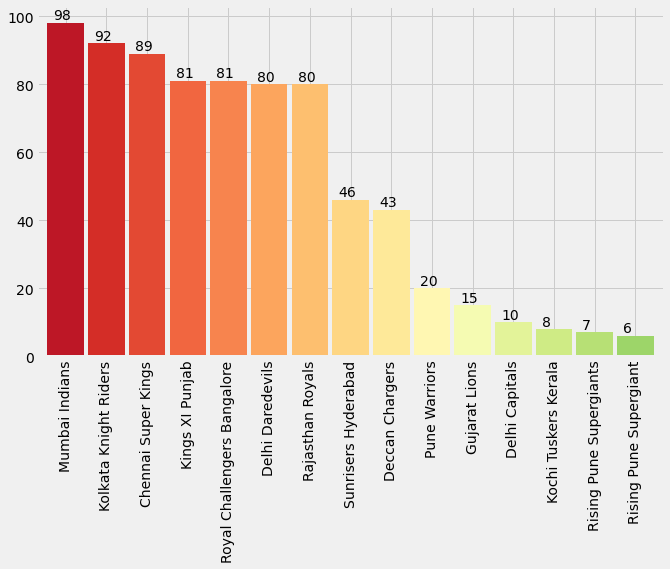

In [15]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

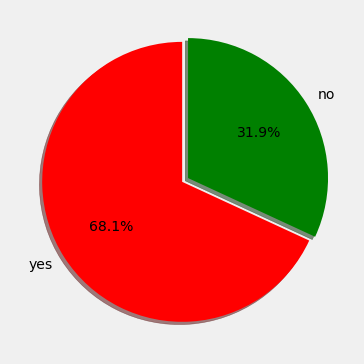

In [16]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

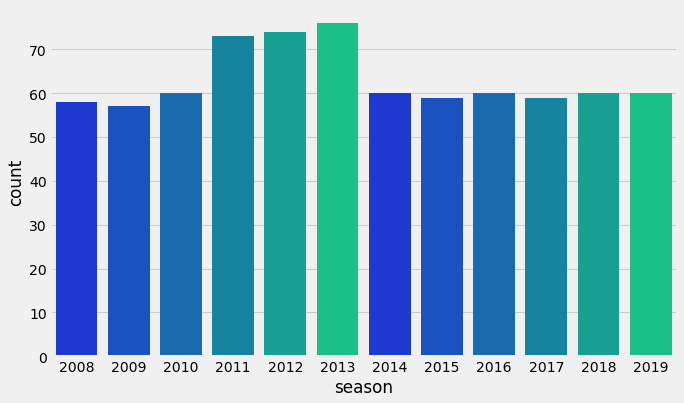

In [17]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

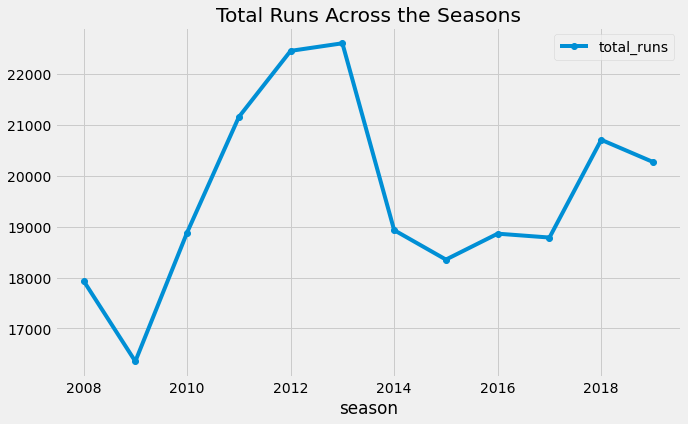

In [18]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

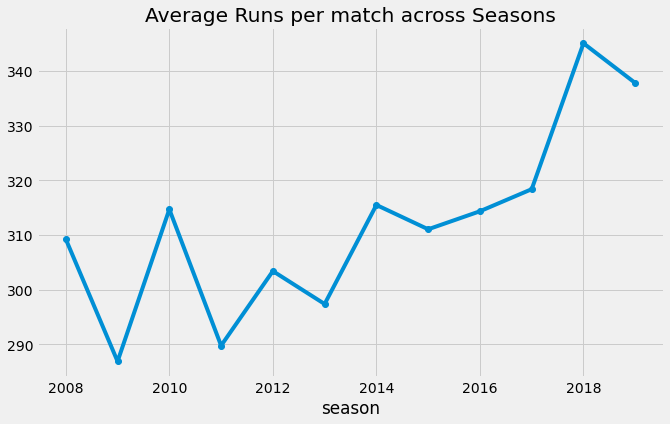

In [19]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

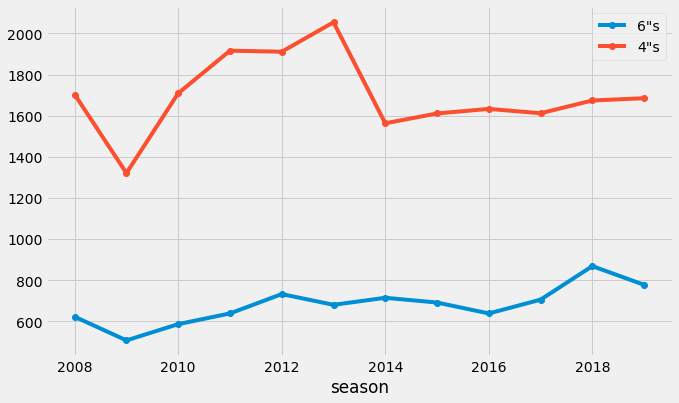

In [20]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

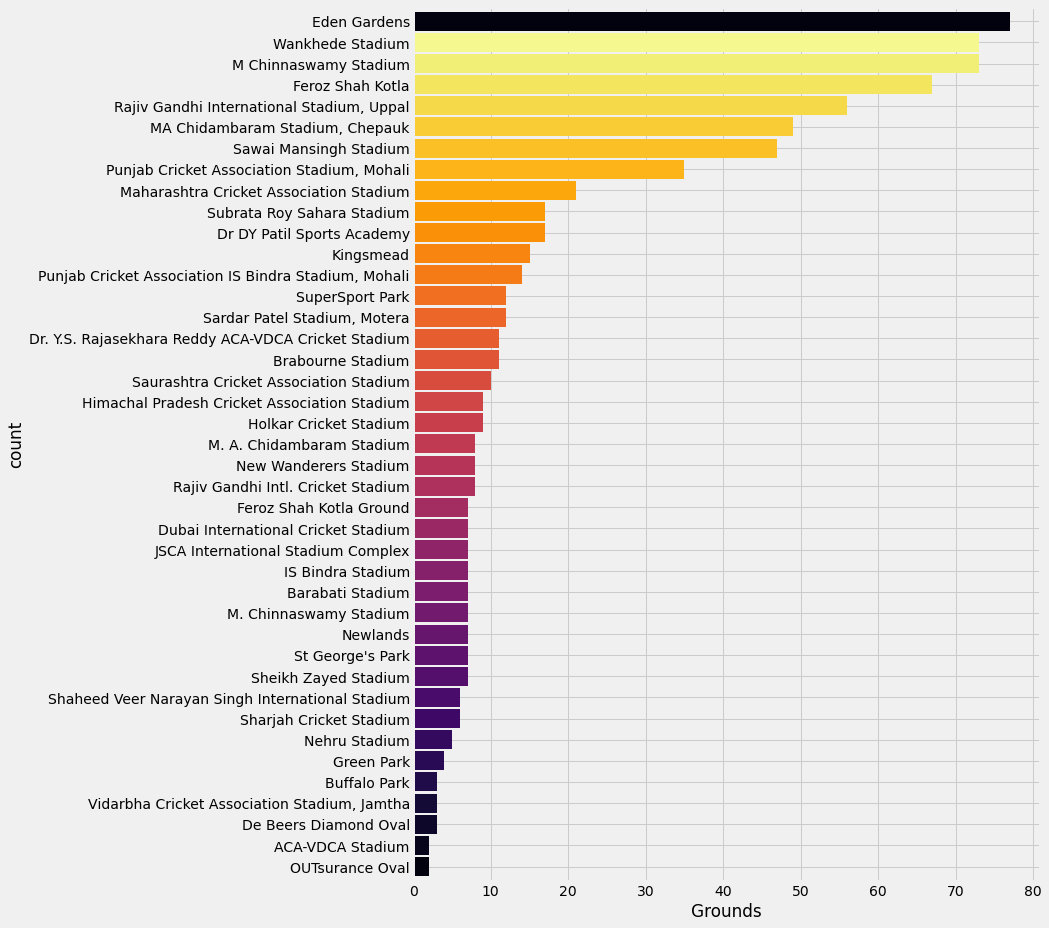

In [22]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

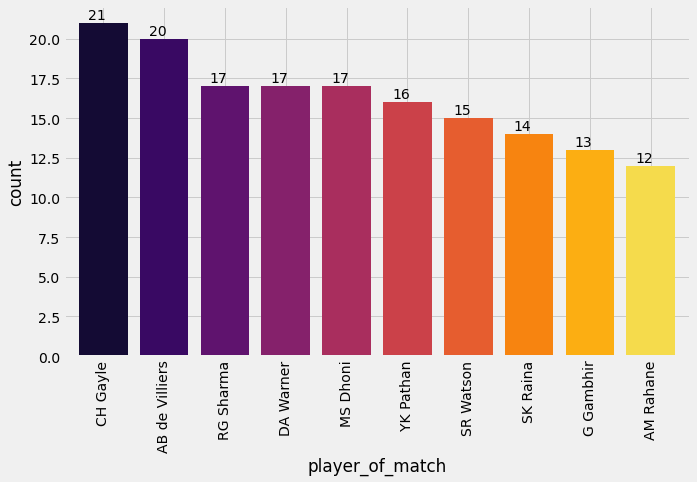

In [23]:
mlt.subplots(figsize=(10,6))
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

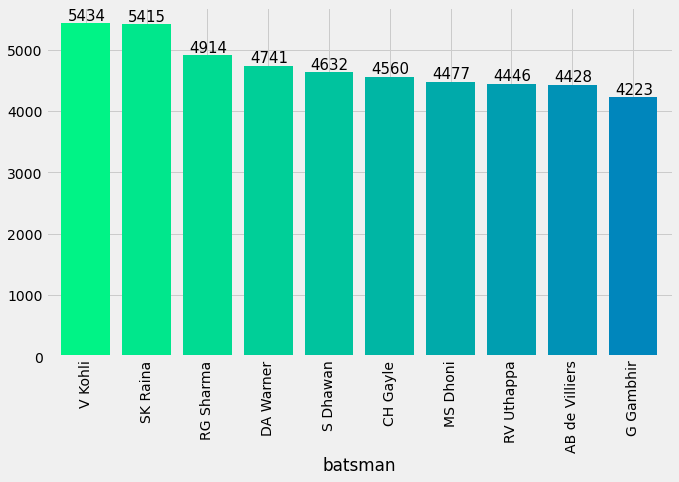

In [24]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

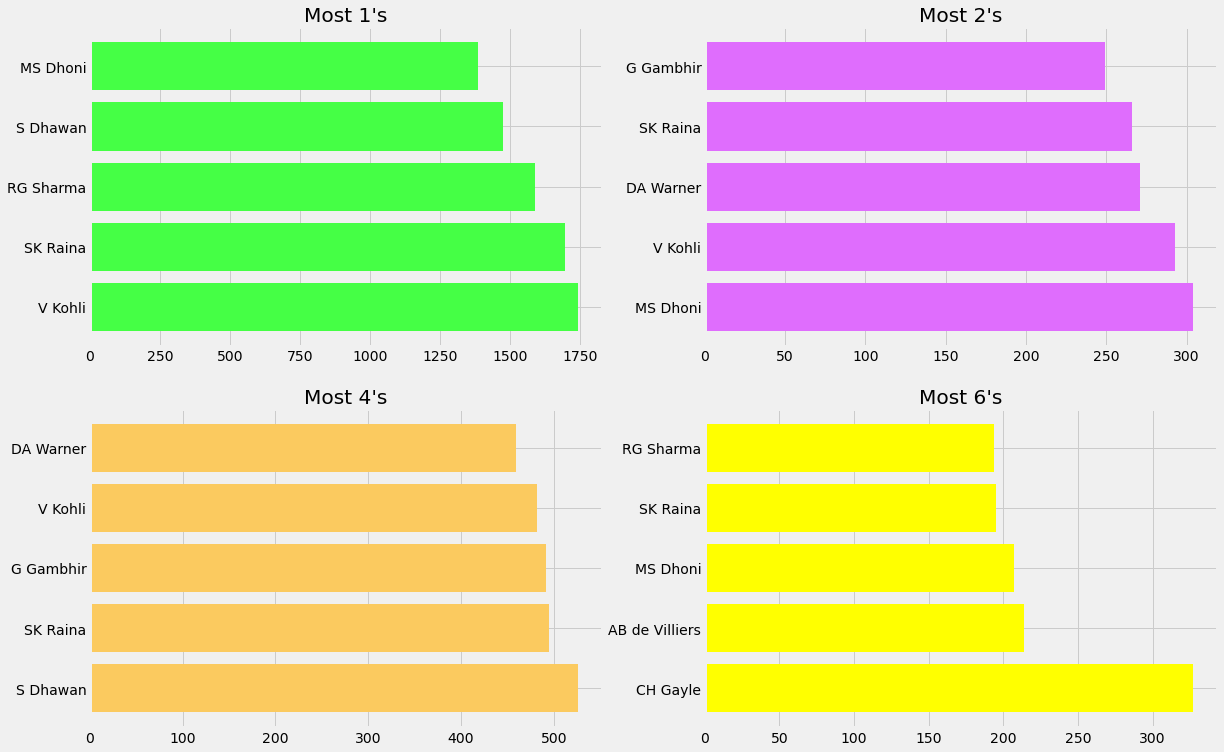

In [25]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

In [26]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


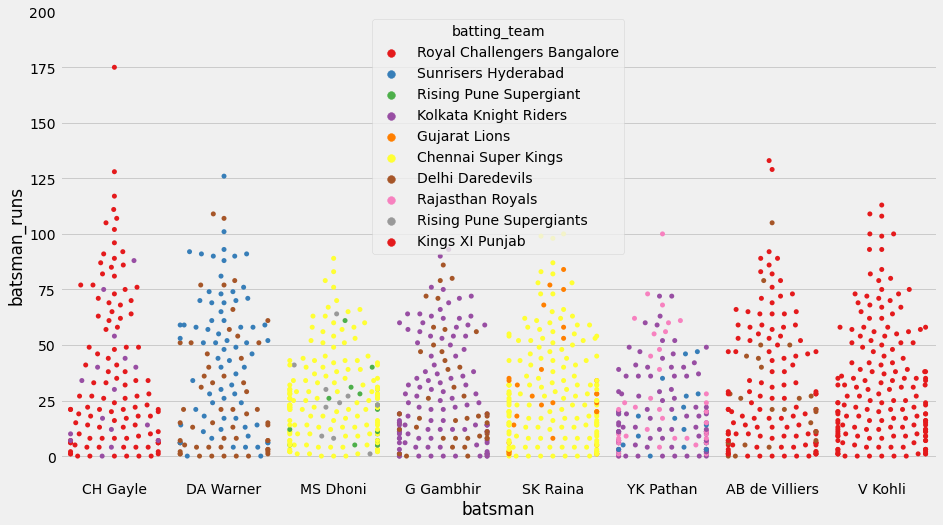

In [27]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()

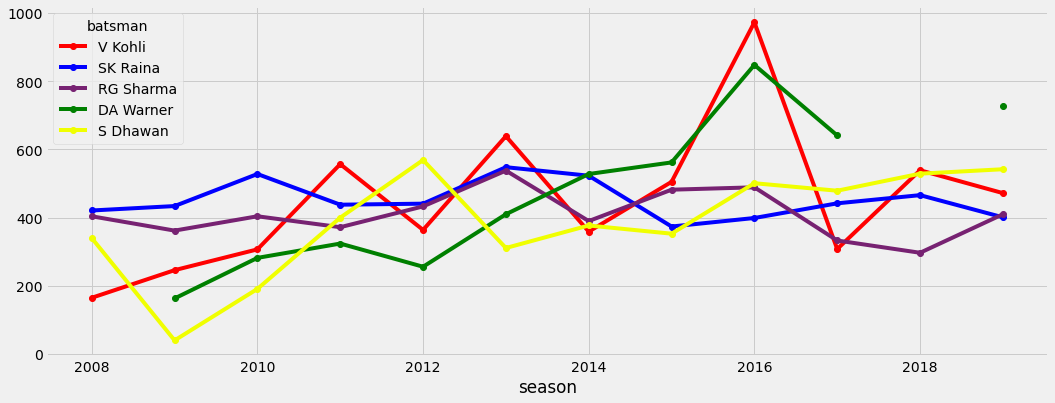

In [28]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()